<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Shri Ramdeobaba College of Engineering and Management<br>Nagpur 440013</h1></center>
<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Department of Computer Science Engineering (AIML)</h1></center>
<center><h2 style="font-family: 'Inria Serif'; font-size:32px">Data Analysis and Visualization Lab - Practical 1</h2></center>

<hr style="border:0px" />

<div class="text aim" style="font-family: 'Inria Serif'; font-size:28px">Aim : </div>


<h2 style="font-family: 'Inria Serif'; font-size:28px">1. Importing the Libraries</h2>

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn

<h3 style="font-family: 'Inria Serif'; font-size:24px">1.1 Constants</h3>

In [2]:
colors = [
    "#ffbe0b",
    "#fb5607",
    "#ff006e",
    "#8338ec",
    "#3a86ff"
]

sns.set_style('darkgrid')

<h2 style="font-family: 'Inria Serif'; font-size:28px">2. Source Code</h2>

<h3 style="font-family: 'Inria Serif'; font-size:24px">2.1 Linear Regression</h3>

In [3]:
xy_df = pd.read_csv('../data/xy.csv', index_col=False)
xy_df.reset_index(drop=True)

xy_df

,x,y
0,0,2.0
1,2,4.0
2,3,5.0
3,5,6.0
4,6,7.5
5,7,8.5
6,8,9.0
7,8,10.0
8,9,11.0
9,10,12.0


In [4]:
xy_df.describe()

,x,y
count,10.000000,10.00000
mean,5.800000,7.50000
std,3.259175,3.21455
min,0.000000,2.00000
25%,3.500000,5.25000
50%,6.500000,8.00000
75%,8.000000,9.75000
max,10.000000,12.00000


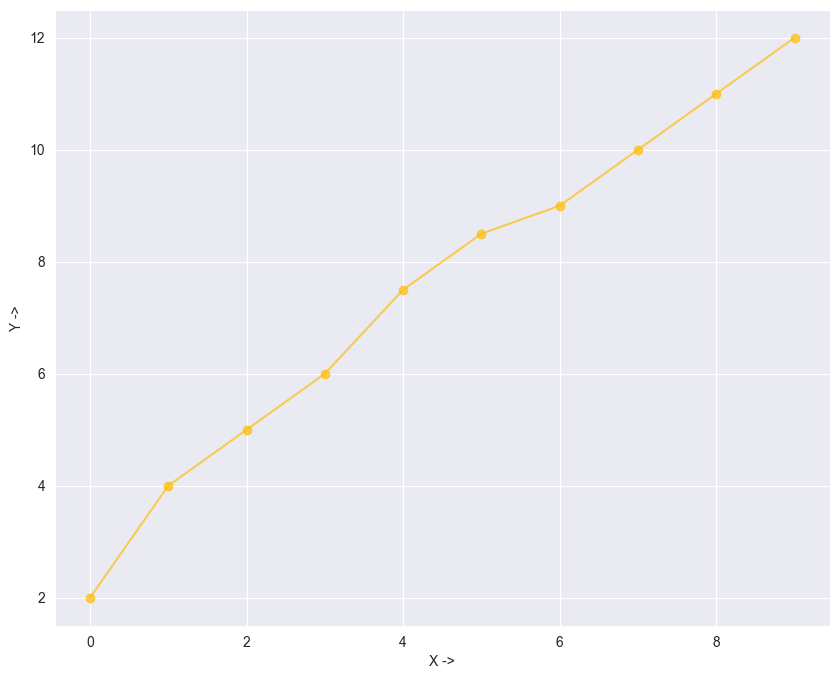

In [5]:
plt.figure(figsize=(10,8))

plt.plot(xy_df['y'], color=colors[0], marker='o', alpha=0.7)
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

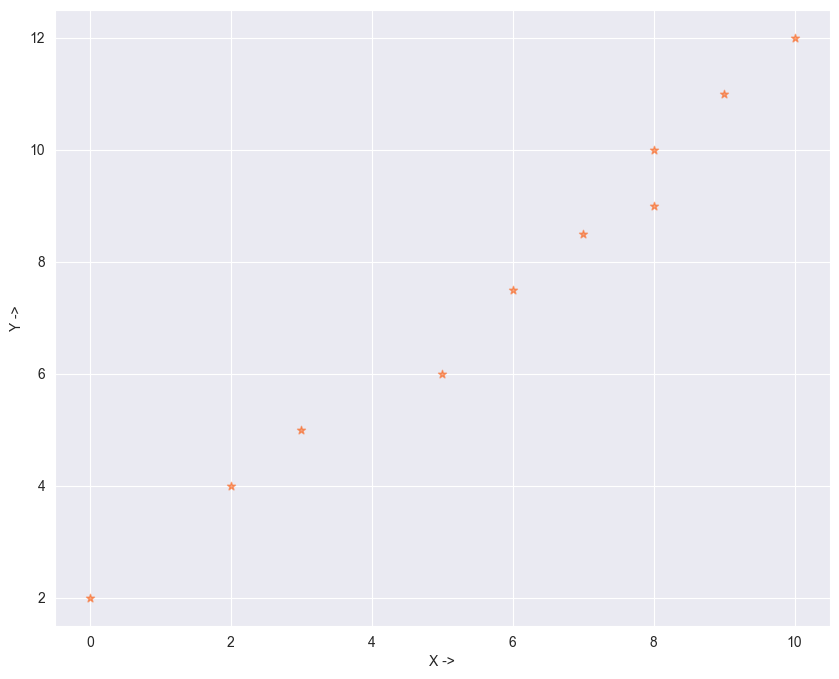

In [6]:
plt.figure(figsize=(10,8))

plt.scatter(x=xy_df['x'], y=xy_df['y'], color=colors[1], marker='*', alpha=0.5)
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

In [7]:
X = torch.tensor(xy_df['x'].values, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(xy_df['y'].values, dtype=torch.float32).view(-1, 1)

In [8]:
X

tensor([[ 0.],
        [ 2.],
        [ 3.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 8.],
        [ 9.],
        [10.]])

In [9]:
Y

tensor([[ 2.0000],
        [ 4.0000],
        [ 5.0000],
        [ 6.0000],
        [ 7.5000],
        [ 8.5000],
        [ 9.0000],
        [10.0000],
        [11.0000],
        [12.0000]])

In [10]:
class LinearModel(nn.Linear):
    def __init__(self):
        super(LinearModel, self).__init__(in_features=1, out_features=1)
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

In [11]:
model = LinearModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [50/1000], Loss: 0.7386
Epoch [100/1000], Loss: 0.5326
Epoch [150/1000], Loss: 0.3994
Epoch [200/1000], Loss: 0.3132
Epoch [250/1000], Loss: 0.2575
Epoch [300/1000], Loss: 0.2214
Epoch [350/1000], Loss: 0.1981
Epoch [400/1000], Loss: 0.1830
Epoch [450/1000], Loss: 0.1733
Epoch [500/1000], Loss: 0.1669
Epoch [550/1000], Loss: 0.1629
Epoch [600/1000], Loss: 0.1602
Epoch [650/1000], Loss: 0.1585
Epoch [700/1000], Loss: 0.1574
Epoch [750/1000], Loss: 0.1567
Epoch [800/1000], Loss: 0.1562
Epoch [850/1000], Loss: 0.1559
Epoch [900/1000], Loss: 0.1557
Epoch [950/1000], Loss: 0.1556
Epoch [1000/1000], Loss: 0.1555


In [13]:
Y_Predicted = model(X)

In [14]:
Y_Predicted

tensor([[ 1.8016],
        [ 3.7647],
        [ 4.7462],
        [ 6.7092],
        [ 7.6907],
        [ 8.6722],
        [ 9.6537],
        [ 9.6537],
        [10.6352],
        [11.6167]], grad_fn=<AddmmBackward0>)

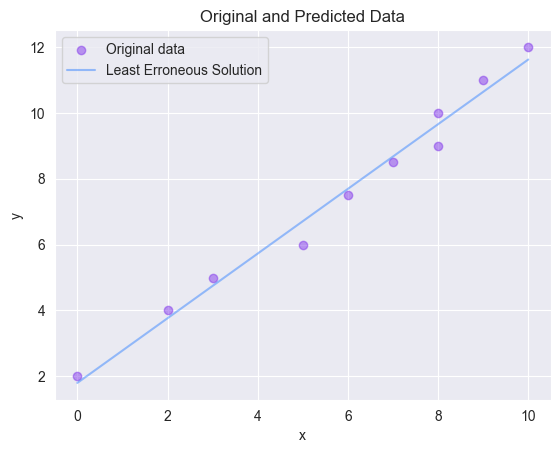

In [15]:
plt.scatter(X.numpy(), Y.numpy(), color=colors[3], label='Original data', alpha=0.5)
plt.plot(X.numpy(), Y_Predicted.detach().numpy(), color=colors[4],alpha=0.5, label='Least Erroneous Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Original and Predicted Data')
plt.show()

<h3 style="font-family: 'Inria Serif'; font-size:24px">2.2 Least Square Method</h3>

In [16]:
marks_df = pd.DataFrame({
    "midterm": [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81],
    "final":[84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]
}, dtype=np.float32)

In [17]:
marks_df

,midterm,final
0,72.0,84.0
1,50.0,63.0
2,81.0,77.0
3,74.0,78.0
4,94.0,90.0
5,86.0,75.0
6,59.0,49.0
7,83.0,79.0
8,65.0,77.0
9,33.0,52.0


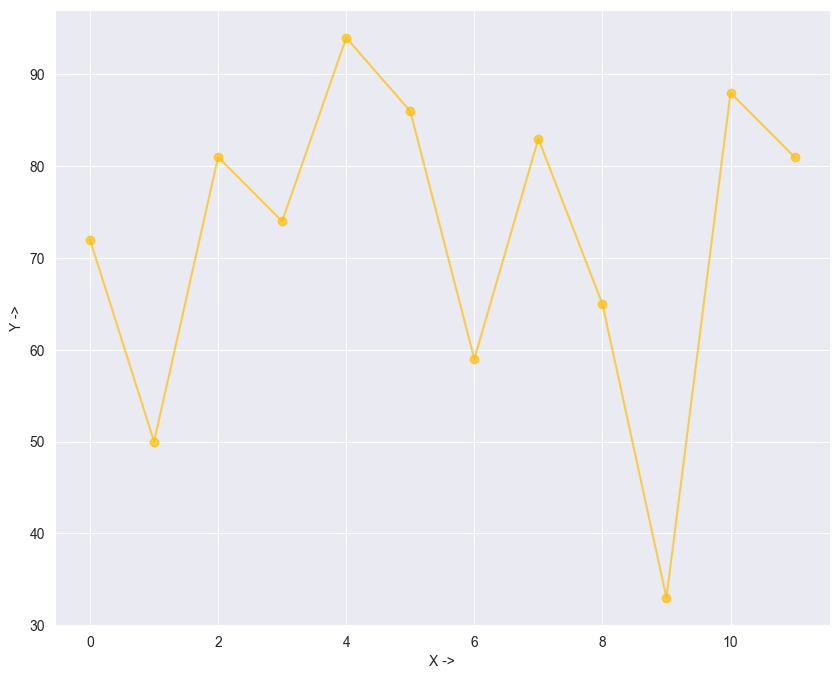

In [18]:
plt.figure(figsize=(10,8))

plt.plot(marks_df['midterm'], color=colors[0], marker='o', alpha=0.7)
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

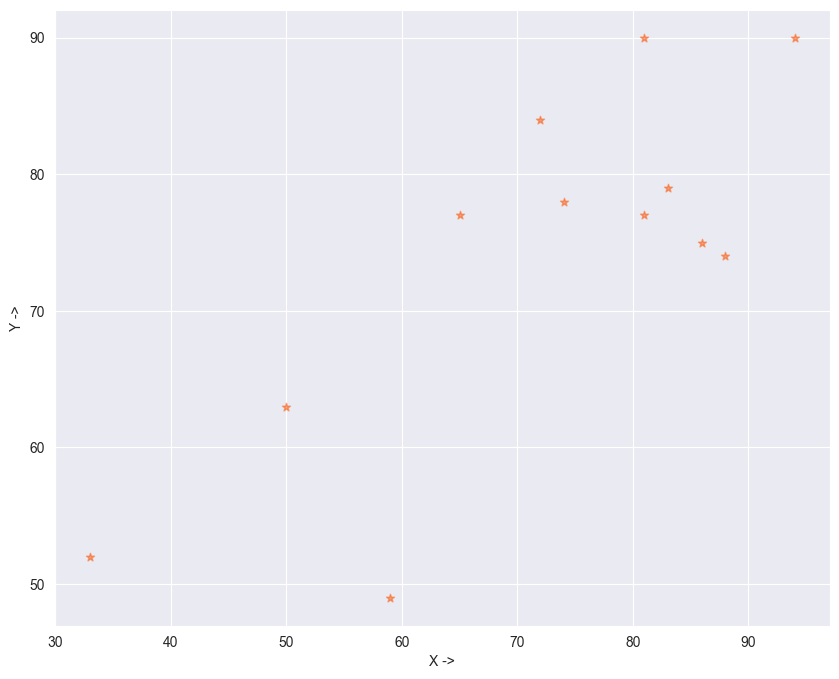

In [19]:
plt.figure(figsize=(10,8))

plt.scatter(x=marks_df['midterm'], y=marks_df['final'], color=colors[1], marker='*', alpha=0.5)
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

In [20]:
def least_squares_midterm_final_exam(midterm_grades, final_exam_grades):
    # Convert input data to numpy arrays
    x = np.array(midterm_grades)
    y = np.array(final_exam_grades)

    # Calculate the coefficients using the least squares formula
    slope = ((np.mean(x) * np.mean(y)) - np.mean(x * y)) / ((np.mean(x) ** 2) - np.mean(x ** 2))
    intercept = np.mean(y) - slope * np.mean(x)

    # Create the equation string
    equation = f"final_exam_grade = {slope:.2f} * midterm_grade + {intercept:.2f}"

    return slope, intercept, equation

slope, intercept, equation = least_squares_midterm_final_exam(marks_df['midterm'], marks_df['final'])

print("Coefficients:")
print("Slope:", slope)
print("Intercept:", intercept)
print("Equation:", equation)

Coefficients:
Slope: 0.5816013640902056
Intercept: 32.027769703912256
Equation: final_exam_grade = 0.58 * midterm_grade + 32.03


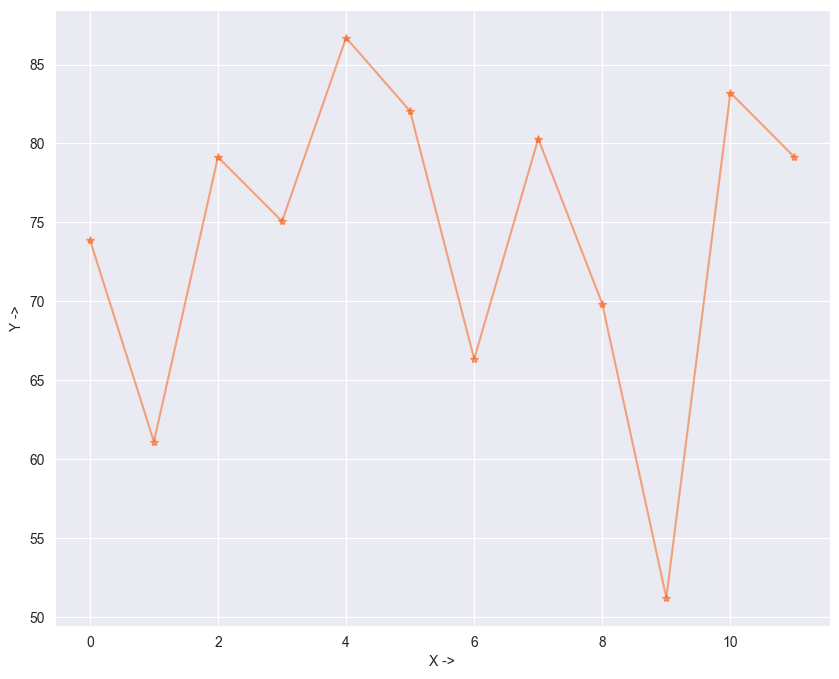

In [21]:
# plot best fit line

final_exam_grade = slope * marks_df["midterm"] + intercept

plt.figure(figsize=(10,8))

plt.plot(final_exam_grade, color=colors[1], marker='*', alpha=0.5)
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

<h3 style="font-family: 'Inria Serif'; font-size:24px">2.3 Polynomial Regression</h3>

In [22]:
cars_df = pd.read_csv('../data/cars_data.csv', index_col=False)

In [23]:
cars_df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


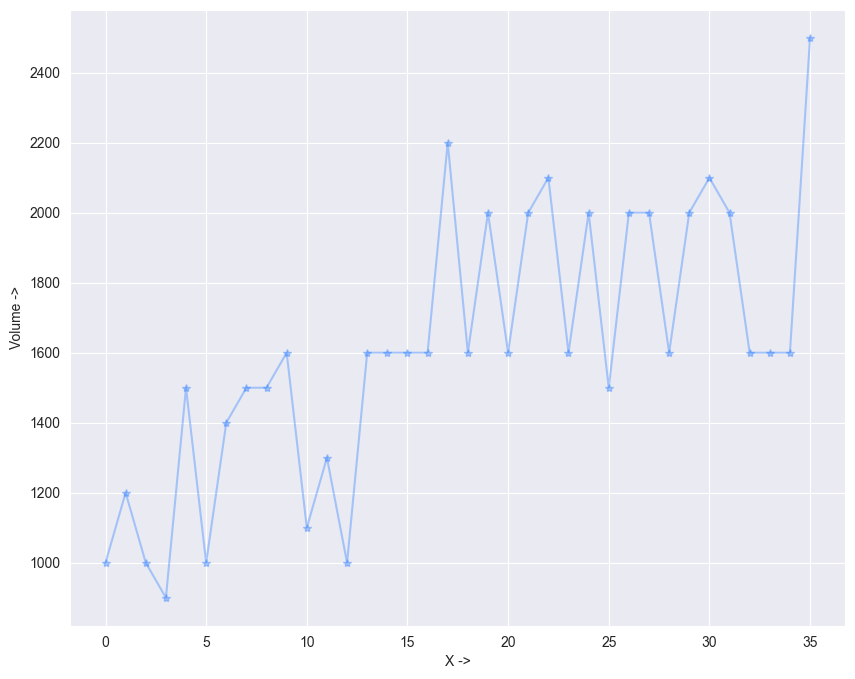

In [24]:
plt.figure(figsize=(10,8))

plt.plot(cars_df['Volume'], color=colors[4], marker='*', alpha=0.4)
plt.xlabel('X ->')
plt.ylabel('Volume ->')

plt.show()

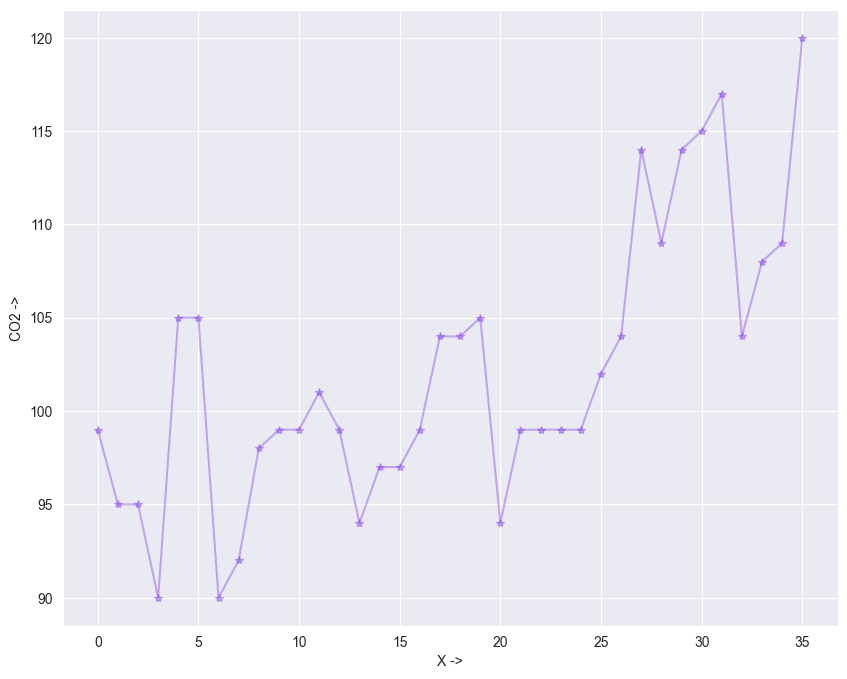

In [25]:
plt.figure(figsize=(10,8))

plt.plot(cars_df['CO2'], color=colors[3], marker='*', alpha=0.4)
plt.xlabel('X ->')
plt.ylabel('CO2 ->')

plt.show()

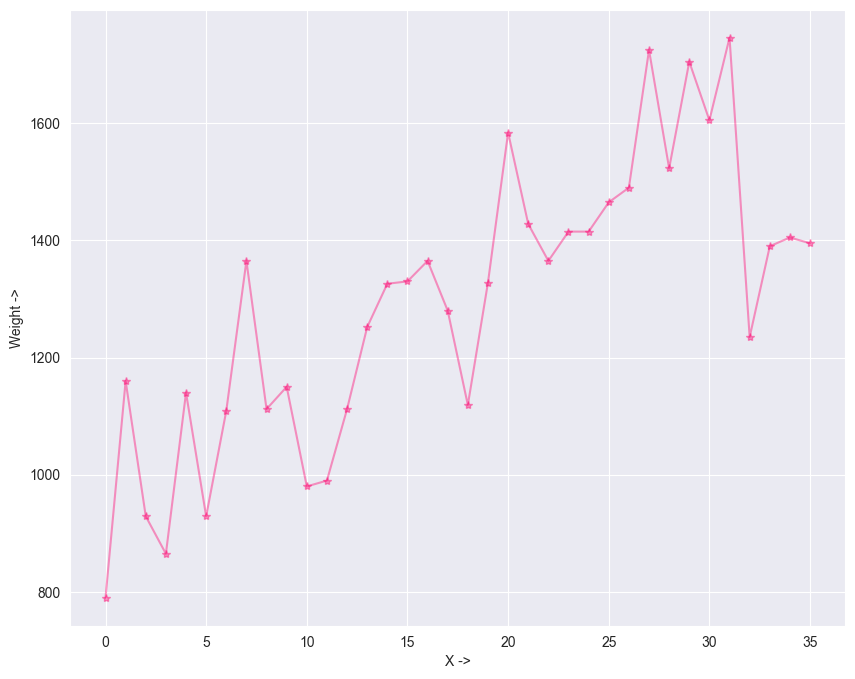

In [26]:
plt.figure(figsize=(10,8))

plt.plot(cars_df['Weight'], color=colors[2], marker='*', alpha=0.4)
plt.xlabel('X ->')
plt.ylabel('Weight ->')

plt.show()

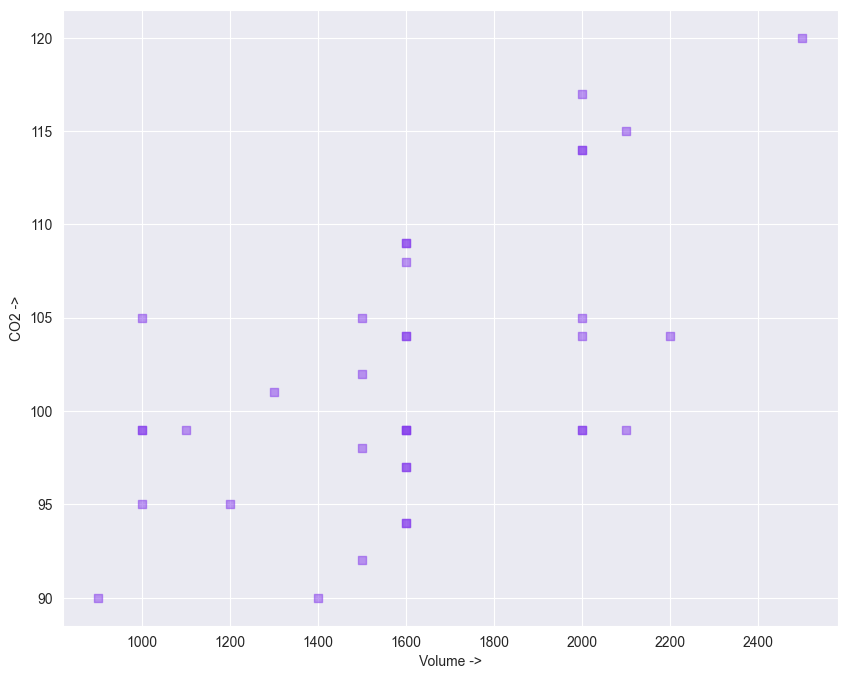

In [27]:
plt.figure(figsize=(10,8))

plt.scatter(x=cars_df['Volume'], y=cars_df['CO2'], color=colors[3], marker='s', alpha=0.5)
plt.xlabel('Volume ->')
plt.ylabel('CO2 ->')

plt.show()

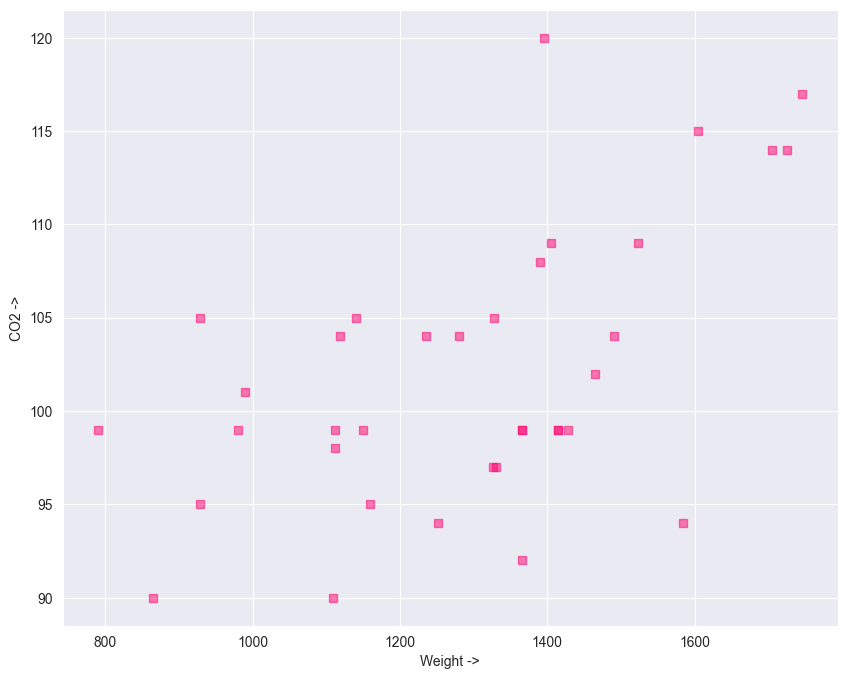

In [28]:
plt.figure(figsize=(10,8))

plt.scatter(x=cars_df['Weight'], y=cars_df['CO2'], color=colors[2], marker='s', alpha=0.5)
plt.xlabel('Weight ->')
plt.ylabel('CO2 ->')

plt.show()

In [34]:
# Polynomial Regression with degree 2 using sklearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = cars_df[['Volume', 'Weight']]
Y = cars_df['CO2']

# poly = PolynomialFeatures(degree=2)
poly = LinearRegression()
# X_poly = poly.fit_transform(X)

poly.fit(X, Y)

LinearRegression()

In [35]:
# Predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300ccm. Also conclude about the obtained result.

poly.predict([[2300, 1300]])

D:\DAVLab\.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.46304306])

In [37]:
new_data = np.array([[2000, 1000], [2500, 1500], [3000, 2000]])

predicted_co2 = poly.predict(new_data)

print("Predicted CO2 emissions:", predicted_co2)

Predicted CO2 emissions: [102.85618162 110.53428402 118.21238642]


D:\DAVLab\.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
{
    'slope': poly.coef_[0],
    'intercept': poly.coef_[1]
}

{'slope': 0.007805257527747128, 'intercept': 0.007550947270300682}